In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = xr.open_dataset('/home/ubuntu/year3/data_visualisation/sst.nc')
data

<xarray.Dataset>
Dimensions:  (time: 504, lon: 144, lat: 72)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-08-01
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Tue Sep 12 07:33:39 2023: cdo remapbil,r144x72 sst.mon.me...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

In [63]:
sst_nino34 = data.sel(lat = slice(5,-5), lon = slice(190,200))

In [64]:
tmp = sst_nino34.sst.groupby('time.month')
tmp1 = tmp - tmp.mean(dim='time')
index_nino34 = tmp1.mean(dim=['lat', 'lon'])


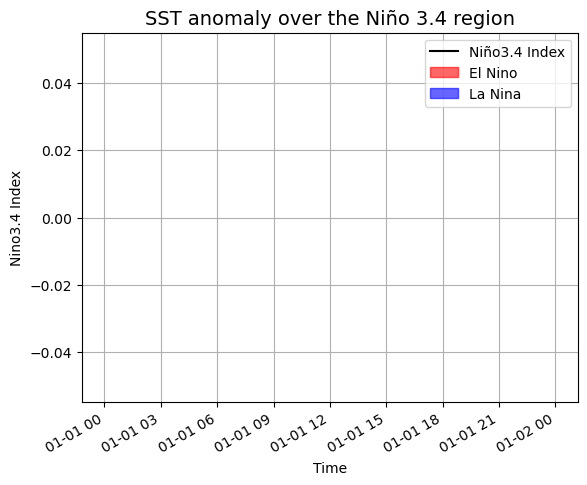

In [65]:
index_nino34.plot(color='black', label='Niño3.4 Index')
plt.fill_between(index_nino34.time, index_nino34, 1, where=index_nino34 >= 1, color='red', alpha=0.6, label='El Nino')
plt.fill_between(index_nino34.time, index_nino34, -1, where=index_nino34 <= -1, color='blue', alpha=0.6, label='La Nina')
plt.title('SST anomaly over the Niño 3.4 region', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Nino3.4 Index')
plt.grid(True)
plt.legend()
plt.show()


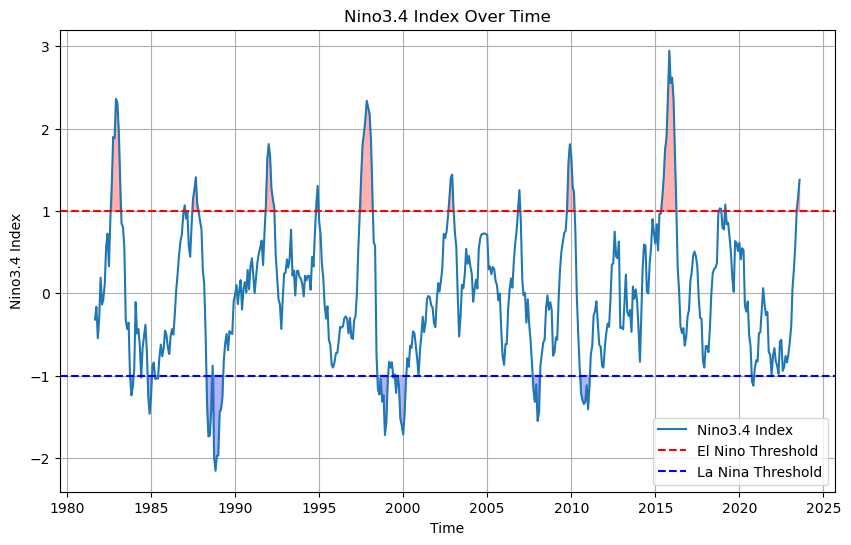

In [4]:
sst = xr.open_dataset('/home/ubuntu/year3/data_visualisation/sst.nc')
sst_nino34 = sst.sel(lat=slice(-5,5),lon=slice(190,240))

tmp = sst_nino34.sst.groupby('time.month')
tmp1 = tmp - tmp.mean(dim = 'time')
index_nino34 = tmp1.mean(dim=['lat', 'lon'])

index_nino34_df = index_nino34.to_dataframe(name='Nino3.4')
index_nino34_df['ElNino'] = index_nino34_df['Nino3.4'] >= 1
index_nino34_df['LaNina'] = index_nino34_df['Nino3.4'] <= -1
index_nino34_df['Neutral'] = (index_nino34_df['Nino3.4'] > -1) & (index_nino34_df['Nino3.4'] < 1)

plt.figure(figsize=(10, 6))
plt.plot(index_nino34_df.index, index_nino34_df['Nino3.4'], label='Nino3.4 Index')
plt.axhline(1, color='r', linestyle='--', label='El Nino Threshold')
plt.axhline(-1, color='b', linestyle='--', label='La Nina Threshold')
plt.fill_between(index_nino34_df.index, 1, index_nino34_df['Nino3.4'], where=index_nino34_df['ElNino'], color='red', alpha=0.3)
plt.fill_between(index_nino34_df.index, -1, index_nino34_df['Nino3.4'], where=index_nino34_df['LaNina'], color='blue', alpha=0.3)
plt.title('Nino3.4 Index Over Time')
plt.xlabel('Time')
plt.ylabel('Nino3.4 Index')
plt.legend()
plt.grid(True)